3.10

A comparison of an n-turn loop antenna and a dipole antenna in terms of directivity 

$$ D(\theta)=\frac{3}{2}sin^2\theta $$
$$ D(\theta)=\frac{2}{1.218}\frac{cos(\frac{\pi}{2}cos^2\theta)}{sin^2\theta} $$

And a comparison of radiation efficiency

$$ \eta_{rad} = \frac{\frac{1}{6}\eta \pi (ka)^4}{\frac{1}{6}\eta \pi (ka)^4 + \frac{a}{b}R_s} $$
$$ \eta_{rad} = \frac{\frac{1}{6\pi}\eta (kl)^2}{\frac{1}{6\pi}\eta (kl)^2 + \frac{l}{2\pi b}R_s} $$

And a comparison of signal power

$$ P_{sig}=S^{inc}\frac{\lambda^2}{4\pi}\eta_{rad}D $$

Maximum directivity of loop antenna:  1.4999990487956547
Maximum directivity of dipole antenna:  1.4999990487956547


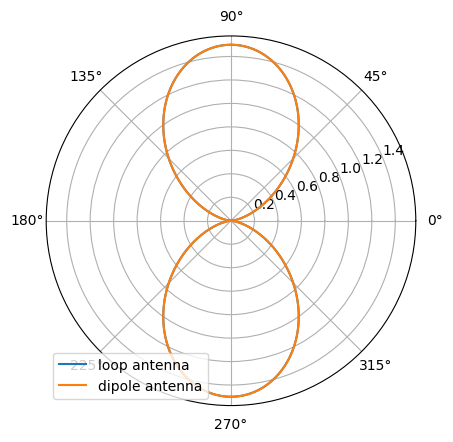

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici

## Directivity ##
# variables
theta = np.arange(0.01, 2*np.pi, 0.01)  # Avoid theta = 0
f = 2.4e9                               # wifi/bluetooth frequency
lam = 3e8/f                             # wavelength
k = 2*np.pi/lam                         # wave number
l = 8e-3                                # length of dipole
gamma = 0.5772                          # Euler's constant

# Directivity of a loop and dipole
D_loop = 3*np.sin(theta)**2 / 2

# hertzian dipole
D_dipole = 3*np.sin(theta)**2 / 2

# half wavelength
#D_dipole = 2*(np.cos(np.pi*np.cos(theta)/2)**2)/(1.218*np.sin(theta)**2) 

#### Radiation resistance of a Finite Dipole ####
# # Integrate over each value in elec_len
# S_1, C_1 = sici(k*l)
# S_2, C_2 = sici(2*k*l)

# # Radiation pattern integral
# f_kl = (gamma 
#         + np.log(k*l) 
#         - C_1 
#         + 0.5*np.sin(k*l) * (S_2-2*S_1) 
#         + 0.5*np.cos(k*l) * (gamma+np.log(k*l/2)+C_2-2*C_1)
#         )
# D_dipole = 2*((np.cos(k*l*np.cos(theta)/2)-np.cos(k*l/2))/(np.sin(theta)))**2/f_kl


# print maximums
print("Maximum directivity of loop antenna: ", max(D_loop))
print("Maximum directivity of dipole antenna: ", max(D_dipole))

# create plots
plt.polar(theta, np.abs(D_loop), label="loop antenna")
plt.polar(theta, np.abs(D_dipole), label="dipole antenna")

# Show legend
plt.legend()

# display plot
plt.show()

In [72]:
## Radiation Efficiency ##
# variables
a = 4e-3                                # radius of loop
b = 0.25e-3                             # radius of loop wire
c = 2*np.pi*b                           # circumference of loop

eta = 377                               # resistance of freespace
sigma = 5.96e7                          # cunductivity of copper
mu_o = 4*np.pi*10**-7                   # magnetic permeability of freespace
mu_r = 0.999994                         # relative permeability of copper
mu = mu_o*mu_r                          # permeability of copper
delta_s = 1 / np.sqrt(np.pi*f*mu*sigma) # skin depth
R_s = 1 / (sigma*delta_s)               # Surface Resistence
print("Surface Radiation", R_s)         # Debug for surface radiation

# calculate the radiation efficiency of the antennas
eta_loop = (eta*np.pi*(k*a)**4/6) / (eta*np.pi*(k*a)**4/6 + a*R_s/b)
eta_dipole = (eta*(k*l)**2/(6*np.pi)) / (eta*(k*l)**2/(6*np.pi) + l*R_s/(2*np.pi*b))
print("radiation efficiency of a loop: ", eta_loop)
print("raditaion efficiency of a dipole: ", eta_dipole)

Surface Radiation 0.012608431300834359
radiation efficiency of a loop:  0.6152529031296988
raditaion efficiency of a dipole:  0.9805314862312843


3.12

(a) Design a square patch antenna at 1.9GHz with a dielectric coefficient of 2.25

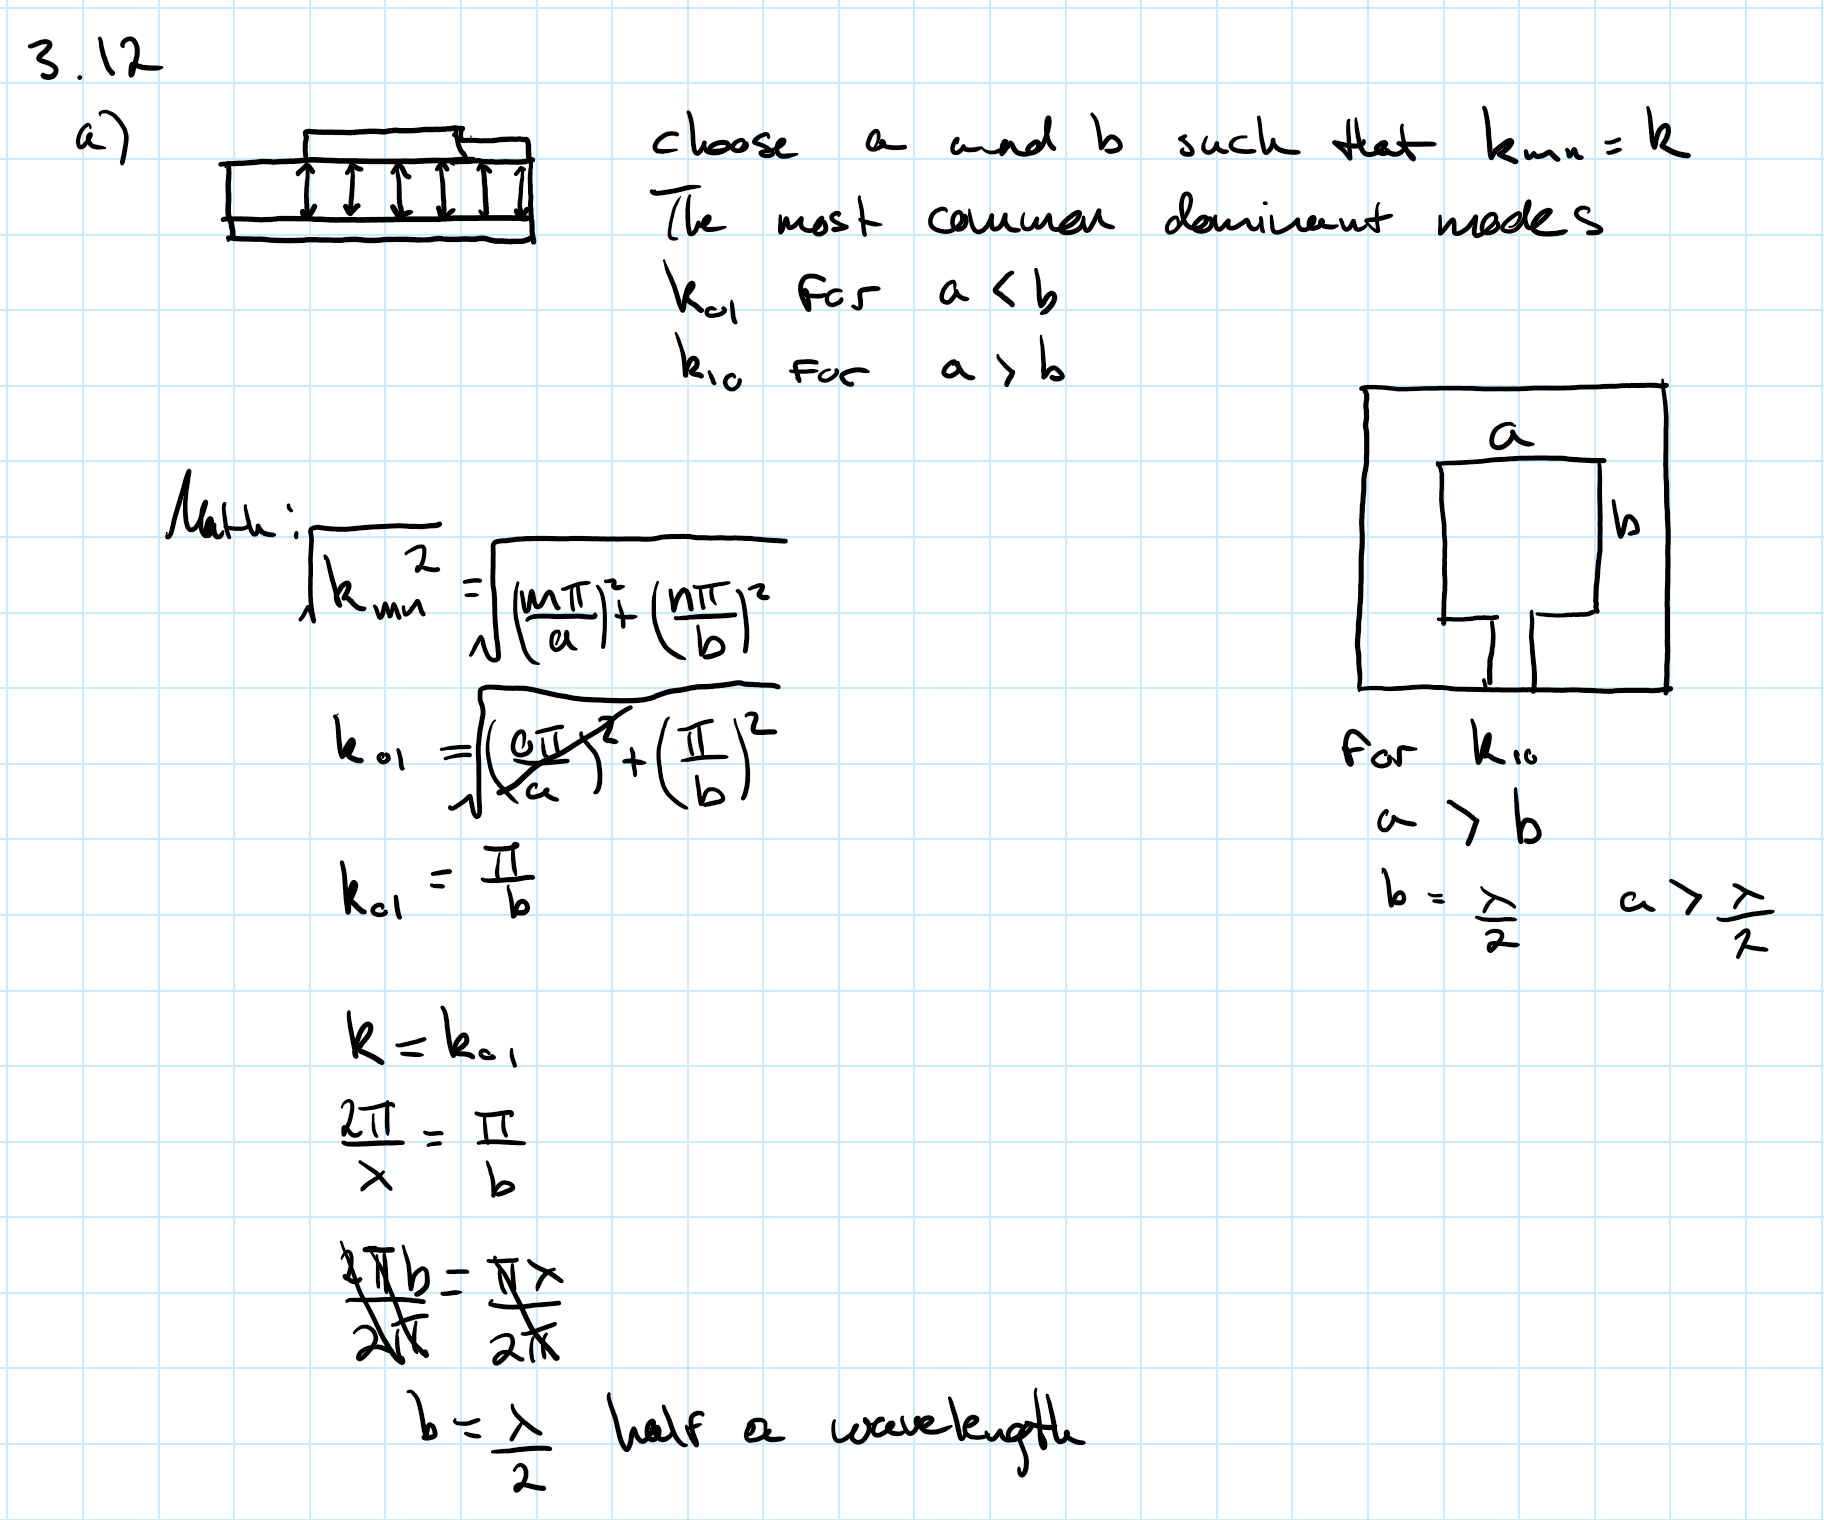

a = 0.02631578947368421
b = 0.05263157894736842


In [73]:
from IPython.display import Image
from IPython.core.display import HTML 

# show work done by hand
display(Image("a and b values.png", width=500, height=500))

# Design a square patch antenna at 1.9GHz with a dielectric coefficient of 2.25
# Constants
f = 1.9e9                   # Frequency in Hz
epsilon = 8.854e-12         # Permittivity of free-space in F/m
mu_0 = 4 * np.pi * 1e-7     # Permeability of free-space in H/m
epsilon_r = 2.25            # Dielectric constant of the material
c_0 = 3e8                   # Speed of light in vacuum in m/s

# Derived quantities
omega = 2 * np.pi * f           # Radial frequency
c = c_0 / np.sqrt(epsilon_r)    # Speed of light in the dielectric
k = omega / c                   # Wavenumber

# Antenna dimensions
b = c_0 / (2 * f * np.sqrt(epsilon_r))  # Length of the patch
a = b / 2                               # Typically, for a square patch, a = b/2 (or the exact relation can vary)

# Output results
print("a =", a)
print("b =", b)

3.12

(b) Plot theta cuts of the radiation pattern for $\phi=0$ and $\phi=\pi/2$

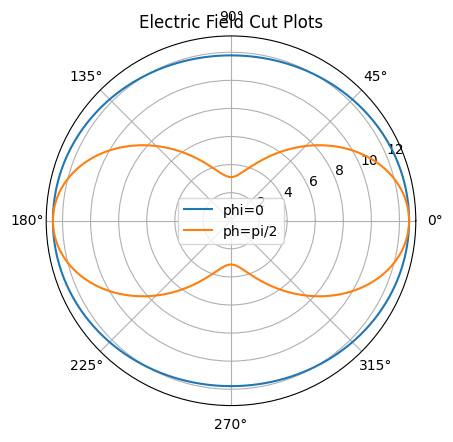

In [74]:
# Plot theta cuts of the radiation pattern for phi=0 and phi=pi/2

# variables
k = 2*np.pi/lam                                     # wave number
omega = 2*np.pi*f                                   # radial frequency
phi_1 = 0                                           # rad cut 1
phi_2 = np.pi/2                                     # rad cut 2
r = 1
t = 1

# for k01
m = 0                                               # mode coefficient
n = 1                                               # mode coefficient

kx_1 = k*np.sin(theta)*np.cos(phi_1)                
kx_2 = k*np.sin(theta)*np.cos(phi_2)
ky_1 = k*np.sin(theta)*np.sin(phi_1)
ky_2 = k*np.sin(theta)*np.sin(phi_2)

g1_1 = 2*np.exp(1j*kx_1*a/2)*np.exp(1j*ky_1*b/2)*np.cos(ky_1*b/2)*np.sin(kx_1*a/2) / (kx_1*a/2)
g1_2 = 2*np.exp(1j*kx_2*a/2)*np.exp(1j*ky_2*b/2)*np.cos(ky_2*b/2)*np.sin(kx_2*a/2) / (kx_2*a/2)

Fx_1 = epsilon*np.exp(-1j*k*r)*2*t*g1_1/(4*np.pi*r)
Fx_2 = epsilon*np.exp(-1j*k*r)*2*t*g1_2/(4*np.pi*r)

E_1 = 1j*omega*eta*Fx_1                                 # cut 1
E_2 = 1j*omega*eta*Fx_2                                 # cut 2

# create plots
plt.polar(theta, np.abs(E_1), label="phi=0")            # plot phi= 0
plt.polar(theta, np.abs(E_2), label="ph=pi/2")          # plot phi=pi/2
plt.title("Electric Field Cut Plots")                   # title
plt.legend()                                            # Show legend
plt.show()                                              # display plot

3.12

(c) Based on the radiation patterns estimate directivity

According to the textbook the directivity should be 6. The pattern is similar to a dipole giving a directivity of 3/2 or 1.5 (see 3.10 - directivity). Then because the patch is square there will be another dipole adding a factor of two. There will be another factor of two for the ground plane.

3

In the research literature, find an electrically small antenna. 

(a) Determine its electrical size, ka, where a is the radius of the smallest sphere containing the antenna, at the design center frequency f0. 

Electrical length is defined as the wire length divided by the wavelength $$L_e = L/\lambda$$

For a wire coil the capacitive effect from multiple turns may change the electric length. If the wire length is defined by the circumference then the electrical length would increase by a factor N for each turn $$L_e=\frac{N*2\pi a}{\lambda}$$ This means $$k=\frac{2\pi N}{\lambda}$$ Since the wire is in free space the wavelength $\lambda$ is unaffected by a different dielectric constant and is given as $$\lambda=\frac{c}{f_0}$$

In [75]:
# For a spherical wire coil antenna
c = 3e8             # speed of light
f0 = 2.4e9          # operating frequency
lam = c / f0        # wavelength
N = 1               # number of turns
k = 2*np.pi*N/lam   # wave number
a = 0.05            # radius of the sphere
le = k*a            # electrical length
print("Electrical Length: ", le)    # print the answer

Electrical Length:  2.5132741228718345


(b) Determine the fractional bandwidth BW/f0. 

In [76]:
Q = 1/(k*a)+1/(k*a)**3
s = 1.5
BW = (s-1/np.sqrt(s))/Q
fractional_bw = BW / f0
print("The fractional bandwidth is: ", fractional_bw)

The fractional bandwidth is:  6.179351115112391e-10


(c) Compute the lossless Q bound for the antenna and estimate the theoretical bandwidth limit. How close is the antenna’s fractional bandwidth to the theoretical bound

In [77]:
Q_bound = 1 / (k*a)**3
print("The bound for the lossless Q: ", Q_bound)

The bound for the lossless Q:  0.06299127818984276
